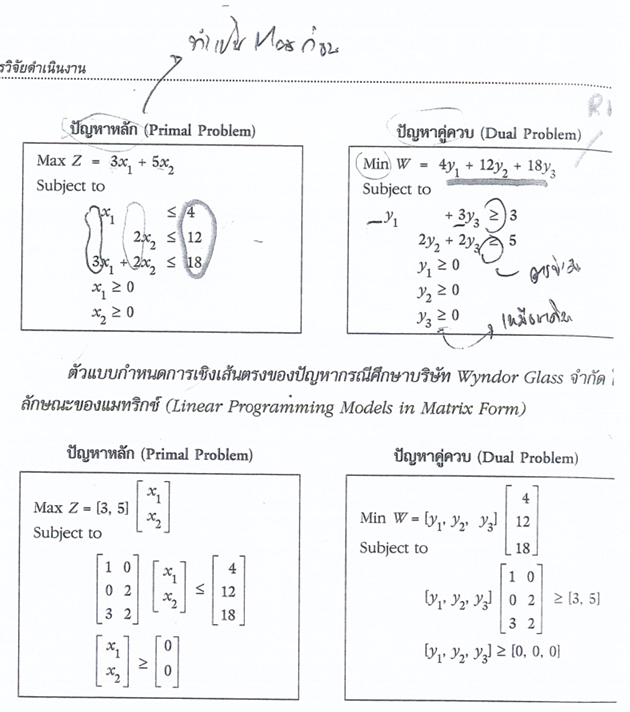

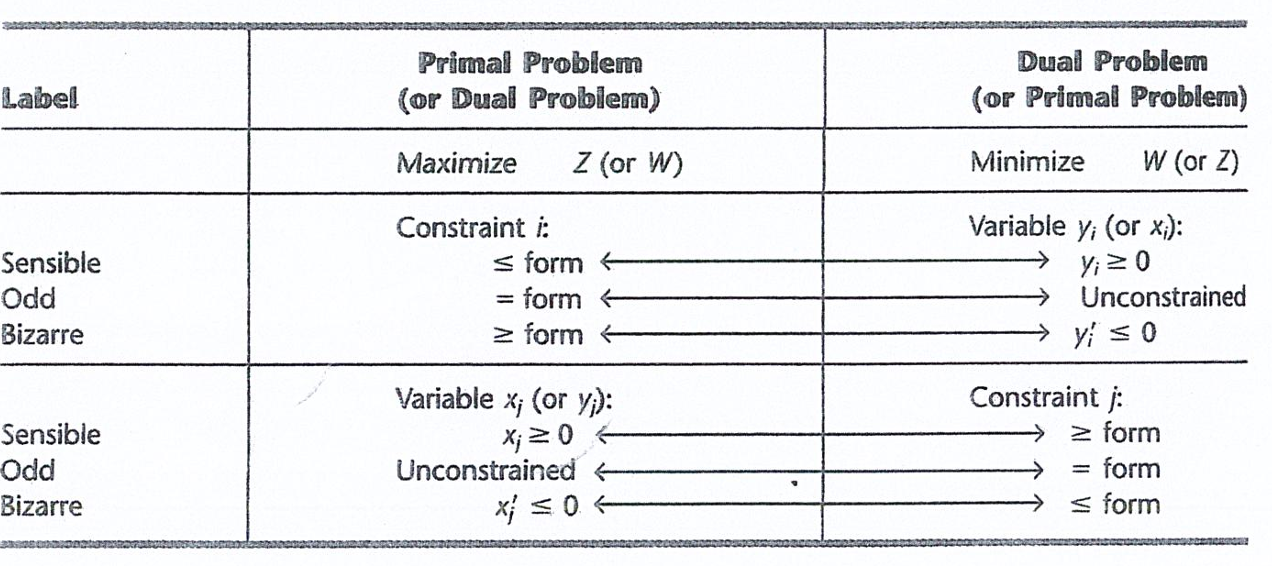

In [37]:
from pulp import *
import numpy as np

def solve_primal_and_dual(A: np.ndarray, b: np.ndarray, c: np.ndarray):
    """
    Solves a primal maximization problem and its corresponding dual minimization problem.

    Primal: Max c^T * x subject to A * x <= b, x >= 0
    Dual:   Min b^T * y subject to A^T * y >= c, y >= 0

    Args:
        A (np.ndarray): The constraint matrix.
        b (np.ndarray): The right-hand side vector of constraints.
        c (np.ndarray): The objective function coefficient vector.
    """
    num_primal_vars = A.shape[1]
    num_primal_constraints = A.shape[0]

    # --- Primal Problem (Maximize) ---
    primal_prob = LpProblem("Primal_Problem", LpMaximize)
    x = [LpVariable(f"x_{i}", 0) for i in range(num_primal_vars)]
    primal_prob += lpSum(c[i] * x[i] for i in range(num_primal_vars))
    for i in range(num_primal_constraints):
        primal_prob += lpSum(A[i, j] * x[j] for j in range(num_primal_vars)) <= b[i]

    # Solve and print primal results
    primal_prob.solve()
    print("Primal Problem Solution:")
    print(f"Status: {LpStatus[primal_prob.status]}")
    print(f"Optimal Value (Z): {primal_prob.objective.value():.2f}")
    if primal_prob.status == LpStatusOptimal:
        print("Variable values:", [v.value() for v in primal_prob.variables()])

    # --- Dual Problem (Minimize) ---
    dual_prob = LpProblem("Dual_Problem", LpMinimize)
    y = [LpVariable(f"y_{i}", 0) for i in range(num_primal_constraints)]
    dual_prob += lpSum(b[i] * y[i] for i in range(num_primal_constraints))
    A_T = A.T
    for j in range(num_primal_vars):
        dual_prob += lpSum(A_T[j, i] * y[i] for i in range(num_primal_constraints)) >= c[j]

    # Solve and print dual results
    dual_prob.solve()
    print("\nDual Problem Solution:")
    print(f"Status: {LpStatus[dual_prob.status]}")
    print(f"Optimal Value (W): {dual_prob.objective.value():.2f}")
    if dual_prob.status == LpStatusOptimal:
        print("Variable values:", [v.value() for v in dual_prob.variables()])

    # Verify Duality Theorem
    primal_obj = primal_prob.objective.value()
    dual_obj = dual_prob.objective.value()
    if abs(primal_obj - dual_obj) < 1e-6:
        print("\nDuality Theorem Verified: Primal and Dual objective values are equal.")
    else:
        print("\nDuality Theorem FAILED.")

# Example 1: The original 2-dimensional problem
print("--- Example 1: 2-D Problem ---")
A_ex1 = np.array([[1, 0], 
                  [0, 2], 
                  [3, 2]])
b_ex1 = np.array([4, 12, 18])
c_ex1 = np.array([3, 5])
solve_primal_and_dual(A_ex1, b_ex1, c_ex1)

print("\n" + "="*50 + "\n")



--- Example 1: 2-D Problem ---
Primal Problem Solution:
Status: Optimal
Optimal Value (Z): 36.00
Variable values: [2.0, 6.0]

Dual Problem Solution:
Status: Optimal
Optimal Value (W): 36.00
Variable values: [0.0, 1.5, 1.0]

Duality Theorem Verified: Primal and Dual objective values are equal.


